# **STAT112 2025F TERM FINAL PROJECT**

## This is the final project of the STAT112 course. It consists of a synthetic dataset and data analysis about responses from a community health survey focused on menstrual health and lifestyle. Participants provided demographic and lifestyle information, along with self-reported menstrual cycle characteristics and symptom severity. The dataset is designed for educational and analytics purposes only and does not represent any real individuals.

## Dataset will be imported, cleaned, tidied, analyzed and finally visualized using popular Python libraries, including Pandas, NumPy, Seaborn, Matplotlib and some built-in libraries. Custom written functions will also be employed during this process. This notebook contains every step of this analysis. 

# **Import necessary Python libraries**

In [792]:
# Data import, cleaning and tidying
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Standard libraries for custom functions
import os
import string

# **Custom helper functions to clean and tidy data**

In [793]:
# Create a function to find outliers using IQR
def find_outliers_IQR(df):
    #this function takes a dataframe or only a column and calculates outliers for each value based on IQR
    q1 = df.quantile(0.25) # variable for the first quartile
    q3 = df.quantile(0.75) #variable for the third quartile
    IQR = q3 - q1 #calculate the IQR
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] #calculate outliers for every value and put them in a series
    return outliers


# Range function
def range_column(column):
    max = column.max()
    min = column.min()
    range = max-min
    return range



# (NA/Null) Value Percentage Calculator
def naValues(df):
    for column in df:
        total_values = len(df.index) # number of all values in a column
        total_garb = df[column].isna().sum() # number off all NA/Null values 
        garb_perc = (total_garb * 100) // total_values
        print(column, " has total of ", total_garb, " NA/Null values")
        print("NA/Null percentage of ", column," is ", garb_perc, "%\n")
            

# A function that tidies strings in columns.
def str_basicclean(df,column ='',style = 'cap',sp_char = string.whitespace): # capitalizes strings and strips whitespaces by default, it can strip anything if provided as argument.
    
    if type(sp_char) == str:    
        df[column] = df[column].str.strip(sp_char)
    else:
        df[column] = df[column].str.strip()
    
    if style == 'up':
        df[column] = df[column].str.upper()
    elif style == 'low':
        df[column] = df[column].str.lower()
    elif style == 'cap':
        df[column] = df[column].str.capitalize()
    
    return df[column]

# **Data Cleaning and Tidying, with Exploratory Data Analysis**

## **Import data**

In [794]:
df = pd.read_csv("dirty_menstrual_health_dataset.csv")

## **Display information about the raw dataset**

In [795]:
# General information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age Years                 1504 non-null   float64
 1   bmi                       1504 non-null   float64
 2   educationlevel            1507 non-null   object 
 3   Employmetstatus           1506 non-null   object 
 4   SMOKINGSTATUS             1502 non-null   object 
 5   Contraceptiveuse          1498 non-null   object 
 6   Dietpattern               1504 non-null   object 
 7   Healthcreaccess           1502 non-null   object 
 8   Pcos Dianosis             1500 non-null   object 
 9   endometriosis_diagnosis   1507 non-null   object 
 10  Stressscore 0 40          1507 non-null   float64
 11  cyclelength_days          1504 non-null   float64
 12  periodduration_days       1501 non-null   float64
 13  Painscore 0 10            1502 non-null   float64
 14  highsymp

#### Categorical (object) and numerical (float64/int64) values should be handled separately. 

In [796]:
# Descriptive table about quantitative values.

df.describe()

,Age Years,bmi,Stressscore 0 40,cyclelength_days,periodduration_days,Painscore 0 10
count,1504.000000,1504.000000,1507.000000,1504.000000,1501.000000,1502.000000
mean,28.292553,24.066356,18.805574,28.953923,4.997868,3.963249
std,7.266035,4.393441,6.107929,3.016589,1.308921,2.050890
min,15.000000,16.000000,0.000000,21.000000,2.000000,0.000000
25%,23.000000,20.900000,15.000000,26.900000,4.100000,2.500000
50%,28.000000,23.900000,19.000000,28.900000,5.000000,3.900000
75%,33.000000,27.000000,23.000000,31.000000,5.900000,5.300000
max,49.000000,40.000000,40.000000,40.600000,9.400000,10.000000


In [797]:
# Head and tail, just to see what is going on. 10 lines each to get a better view.

display(df.head(10), df.tail(10))

,Age Years,bmi,educationlevel,Employmetstatus,SMOKINGSTATUS,Contraceptiveuse,Dietpattern,Healthcreaccess,Pcos Dianosis,endometriosis_diagnosis,Stressscore 0 40,cyclelength_days,periodduration_days,Painscore 0 10,highsympomburden
0,17.0,26.1,Master,Employed,Former,Hormonal,Balanced,Good,No,No,18.0,27.7,4.6,4.4,Low
1,39.0,27.4,Bachelor,Unemployed/Other,NaN,Hormonal,Balanced,Moderate,No,No,21.0,30.4,5.3,2.0,High
2,36.0,27.9,Master,Employed,Never,Hormonal,High-sugar/Processed,Good,No,No,23.0,30.4,4.5,3.7,Low
3,31.0,23.9,Bachelor,Employed,Former,Hormonal,Balanced,Good,No,No,19.0,34.4,5.7,2.8,Low
4,30.0,24.5,Middle/High School,Employed,Never,Hormonal,Balanced,Good,No,NO*,21.0,30.0,4.6,1.4,Low
5,38.0,26.5,PhD/Professional,Employed,Former,Hormonal,Balanced,Moderate,NO~,No,19.0,26.6,4.3,5.5,High
6,37.0,21.8,Master,Employed,Never,Hormonal,High-sugar/Processed,Poor,No,No,22.0,29.6,4.8,7.4,High
7,37.0,18.9,Master,Employed,Never,Hormonal,Vegetarian,Moderate,No,No,17.0,21.3,2.3,5.1,Low
8,32.0,20.3,Middle/High School,Student,Never,Hormonal,Vegetarian,Moderate,No,No,25.0,28.2,3.9,4.1,High
9,26.0,23.3,Bachelor,Employed,Former,Hormonal,Vegetarian,Moderate,No,No,21.0,31.3,5.7,2.4,NaN


,Age Years,bmi,educationlevel,Employmetstatus,SMOKINGSTATUS,Contraceptiveuse,Dietpattern,Healthcreaccess,Pcos Dianosis,endometriosis_diagnosis,Stressscore 0 40,cyclelength_days,periodduration_days,Painscore 0 10,highsympomburden
1502,24.0,26.8,Bachelor,Employed,Never,Hormonal,High-sugar/Processed,Moderate,No,No,17.0,28.4,2.3,8.3,Low
1503,24.0,18.5,Bachelor,Student,Never,Hormonal,Balanced,Moderate,No,No,28.0,31.3,4.3,2.3,Low
1504,34.0,20.1,Master,Employed,Current,Hormonal,High-sugar/Processed,Poor,No,No,20.0,29.6,5.4,5.9,High
1505,24.0,23.9,Middle/High School,Student,Never,Hormonal,Low-carb/Keto,GOOD,No,No,25.0,27.8,4.1,4.6,Low
1506,24.0,24.5,Bachelor,Employed,Former,Hormonal,Low-carb/Keto,Moderate,No,No,24.0,26.1,5.5,3.4,Low
1507,33.0,17.2,Bachelor,Employed,Never,Hormonal,Balanced,Poor,No,No,19.0,28.7,5.3,3.7,High
1508,31.0,21.2,Bachelor,Employed,Current,Hormonal,Balanced,Poor,No,No,14.0,29.9,4.9,1.9,Low
1509,34.0,24.5,middle/high shcool*,Employed,Never,Hormonal,Balanced,Good,No,No,15.0,24.2,5.6,5.2,Low
1510,29.0,25.5,Bachelor,Student,Never,Hormonal,Balanced,Good,Yes,No,22.0,30.2,4.9,7.3,High
1511,25.0,29.0,Bachelor,Unemployed/Other,Never,Hormonal,Vegetarian,Moderate,No,No,16.0,31.8,5.0,4.9,Low


#### According to the data description, Age, BMI, Stress Score, Cycle Length, Period Duration, and Pain Score are bound by their ranges and continuity or discreteness. As seen from ```df.describe()```, ranges are perfectly met with all numerical values.

#### All of the variable names in the columns should be corrected regarding the data description.

In [798]:
# Remove any whitespace before renaming for good measure
df = df.rename(columns=lambda x: x.strip())

# Rename columns
df = df.rename(columns = {
                "Age Years": "Age (years)",
                "bmi": "BMI",
                "educationlevel": "Education Level",
                "Employmetstatus": "Employment Status",
                "SMOKINGSTATUS": "Smoking Status",
                "Contraceptiveuse": "Contraceptive Use",
                "Dietpattern": "Diet Pattern",
                "Healthcreaccess": "Healthcare Access",
                "Pcos Dianosis": "PCOS Diagnosis",
                "endometriosis_diagnosis": "Endometriosis Diagnosis",
                "Stressscore 0 40": "Stress Score (0-40)",
                "cyclelength_days": "Cycle Length (days)",
                "periodduration_days" : "Period Duration (days)",
                "Painscore 0 10": "Pain Score (0-10)",
                "highsympomburden": "High Symptom Burden"})
df.head(10)

,Age (years),BMI,Education Level,Employment Status,Smoking Status,Contraceptive Use,Diet Pattern,Healthcare Access,PCOS Diagnosis,Endometriosis Diagnosis,Stress Score (0-40),Cycle Length (days),Period Duration (days),Pain Score (0-10),High Symptom Burden
0,17.0,26.1,Master,Employed,Former,Hormonal,Balanced,Good,No,No,18.0,27.7,4.6,4.4,Low
1,39.0,27.4,Bachelor,Unemployed/Other,NaN,Hormonal,Balanced,Moderate,No,No,21.0,30.4,5.3,2.0,High
2,36.0,27.9,Master,Employed,Never,Hormonal,High-sugar/Processed,Good,No,No,23.0,30.4,4.5,3.7,Low
3,31.0,23.9,Bachelor,Employed,Former,Hormonal,Balanced,Good,No,No,19.0,34.4,5.7,2.8,Low
4,30.0,24.5,Middle/High School,Employed,Never,Hormonal,Balanced,Good,No,NO*,21.0,30.0,4.6,1.4,Low
5,38.0,26.5,PhD/Professional,Employed,Former,Hormonal,Balanced,Moderate,NO~,No,19.0,26.6,4.3,5.5,High
6,37.0,21.8,Master,Employed,Never,Hormonal,High-sugar/Processed,Poor,No,No,22.0,29.6,4.8,7.4,High
7,37.0,18.9,Master,Employed,Never,Hormonal,Vegetarian,Moderate,No,No,17.0,21.3,2.3,5.1,Low
8,32.0,20.3,Middle/High School,Student,Never,Hormonal,Vegetarian,Moderate,No,No,25.0,28.2,3.9,4.1,High
9,26.0,23.3,Bachelor,Employed,Former,Hormonal,Vegetarian,Moderate,No,No,21.0,31.3,5.7,2.4,NaN


In [799]:
df.nunique()

Age (years)                 35
BMI                        190
Education Level             30
Employment Status           28
Smoking Status              34
Contraceptive Use           21
Diet Pattern                40
Healthcare Access           29
PCOS Diagnosis              17
Endometriosis Diagnosis     18
Stress Score (0-40)         38
Cycle Length (days)        157
Period Duration (days)      70
Pain Score (0-10)           97
High Symptom Burden         20
dtype: int64

In [800]:
# Duplicate value check
display(df.duplicated().sum(), df[df.duplicated(keep=False)])

np.int64(12)

,Age (years),BMI,Education Level,Employment Status,Smoking Status,Contraceptive Use,Diet Pattern,Healthcare Access,PCOS Diagnosis,Endometriosis Diagnosis,Stress Score (0-40),Cycle Length (days),Period Duration (days),Pain Score (0-10),High Symptom Burden
118,25.0,29.0,Bachelor,Unemployed/Other,Never,Hormonal,Vegetarian,Moderate,No,No,16.0,31.8,5.0,4.9,Low
228,24.0,18.5,Bachelor,Student,Never,Hormonal,Balanced,Moderate,No,No,28.0,31.3,4.3,2.3,Low
244,34.0,25.1,Bachelor,Employed,Never,Hormonal,Balanced,Moderate,No,No,11.0,26.7,5.7,3.7,Low
330,31.0,21.2,Bachelor,Employed,Current,Hormonal,Balanced,Poor,No,No,14.0,29.9,4.9,1.9,Low
368,24.0,26.8,Bachelor,Employed,Never,Hormonal,High-sugar/Processed,Moderate,No,No,17.0,28.4,2.3,8.3,Low
411,22.0,19.6,Bachelor,Student,Never,Homronal,Vegetarian,Good,No,No,15.0,31.4,4.0,4.1,Low
657,24.0,23.9,Middle/High School,Student,Never,Hormonal,Low-carb/Keto,GOOD,No,No,25.0,27.8,4.1,4.6,Low
753,24.0,24.5,Bachelor,Employed,Former,Hormonal,Low-carb/Keto,Moderate,No,No,24.0,26.1,5.5,3.4,Low
813,29.0,25.5,Bachelor,Student,Never,Hormonal,Balanced,Good,Yes,No,22.0,30.2,4.9,7.3,High
1008,33.0,17.2,Bachelor,Employed,Never,Hormonal,Balanced,Poor,No,No,19.0,28.7,5.3,3.7,High


#### It wouldn't be unusual to have duplicates with categorical values, however, it would be suspicious if the numerical values matched too.
#### We have 12 observations where this is the case. Those observations should be excluded from the dataframe.  

In [801]:
df = df.drop_duplicates()
# Check again for duplicates
display(df.duplicated().sum(), df[df.duplicated(keep=False)])

np.int64(0)

,Age (years),BMI,Education Level,Employment Status,Smoking Status,Contraceptive Use,Diet Pattern,Healthcare Access,PCOS Diagnosis,Endometriosis Diagnosis,Stress Score (0-40),Cycle Length (days),Period Duration (days),Pain Score (0-10),High Symptom Burden


#### We have successfully removed all duplicates.

### **Tidying Object-Type/Categorical Columns**

In [802]:
# Count the values for columns with object datatype

categorical_cols = df.select_dtypes(exclude = ["int64", "float64"]).columns

for column in categorical_cols:
    print(df[column].value_counts(), "\n")

Education Level
Bachelor                638
Middle/High School      428
Master                  298
PhD/Professional         78
 Bachelor                 6
 Middle/High School       5
 Bachelor                 4
MIDDLE/HIGH SCHOOL        4
Middle/High School        4
bachelor                  3
Bachelor                  3
 Master                   3
master                    2
BACHELOR                  2
Bachelor!                 2
 Middle/High School       1
Msater                    1
PHD/PROFESSIONAL          1
middle/high school*       1
Middle/High Shcool        1
Midlde/High School        1
aMster                    1
Bcahelor                  1
Middle/High School?       1
Master#                   1
middle/high school        1
BACHLEOR*                 1
middle/high shcool*       1
MASTER                    1
Bachelor#                 1
Name: count, dtype: int64 

Employment Status
Employed             872
Student              422
Unemployed/Other     148
 Employed              

#### Let's clean the object type values. First we will use our custom ```str_basicclean()``` function to capitalize and remove whitespace.

In [803]:
for column in categorical_cols:
    df[column] = str_basicclean(df, column)
    print(df[column].value_counts(), "\n")

Education Level
Bachelor               656
Middle/high school     443
Master                 304
Phd/professional        79
Bachelor!                2
Middle/high school*      1
Middle/high shcool       1
Msater                   1
Amster                   1
Midlde/high school       1
Middle/high school?      1
Bcahelor                 1
Master#                  1
Bachleor*                1
Middle/high shcool*      1
Bachelor#                1
Name: count, dtype: int64 

Employment Status
Employed            896
Student             428
Unemployed/other    152
Empolyed              2
Employed~             2
Emlpoyed              2
Employed#             1
Student~              1
Sutdent               1
Student#              1
Stuednt!              1
Emplyoed              1
Employde?             1
Emlpoyed!             1
Meployed?             1
Employed?             1
Epmloyed              1
Meployed              1
Name: count, dtype: int64 

Smoking Status
Never       1002
Current      2

#### ```str_basicclean()``` handled most of the values. Now we will do detailed tidying on the values.

In [804]:
# Education Level
df["Education Level"] = df["Education Level"].replace(["Bachelor!", "Bcahelor", "Bachleor*", "Bachelor#"], "Bachelor")
df["Education Level"] = df["Education Level"].replace(["Middle/high school*", "Middle/high shcool", "Midlde/high school", "Middle/high school?", "Middle/high shcool*"], "Middle/high school")
df["Education Level"] = df["Education Level"].replace(["Msater", "Amster", "Master#"], "Master")

# Employment Status
df["Employment Status"] = df["Employment Status"].replace(["Empolyed", "Employed~", "Emlpoyed", "Employed#", "Emplyoed", "Emplyoed", "Employde?", "Emlpoyed!", "Meployed?", "Employed?", "Epmloyed", "Meployed"], "Employed")
df["Employment Status"] = df["Employment Status"].replace(["Student~", "Student~", "Sutdent", "Student#", "Stuednt!"], "Student")

# Smoking Status 
df["Smoking Status"] = df["Smoking Status"].replace(["Nevre", "Never?", "Never*", "Nveer#", "Never#", "Nevre#", "Nevre*", "Neevr!", "Enver", "Nveer", "Neevr*", "Never!", "Nevre?"], "Never")
df["Smoking Status"] = df["Smoking Status"].replace(["Current~", "Current*", "Currnet~"], "Current")
df["Smoking Status"] = df["Smoking Status"].replace(["Foremr", "Fomrer", "Foremr!", "Formre*"], "Former")

# Contraceptive Use
df["Contraceptive Use"] = df["Contraceptive Use"].replace(["Hormonal!", "Homronal", "Ohrmonal", "Homronal#", "Hromonal", "Hormonal?", "Horomnal~", "Hormnoal", "Hormonal#", "Hromonal!"], "Hormonal")
df["Contraceptive Use"] = df["Contraceptive Use"].replace(["Non-homronal~"], "Non-hormonal")

# Diet Pattern
df["Diet Pattern"] = df["Diet Pattern"].replace(["Balancde", "Balanecd", "Balanced*", "Balacned", "Balanced~", "Ablanced", "Balanced#", "Blaanced", "Blaanced~", "Baalnced#"], "Balanced")
df["Diet Pattern"] = df["Diet Pattern"].replace(["High-sugar/processed!", "High-sugar/porcessed~", "High-sugar/procesesd", "High-sugar/prcoessed*", "Ihgh-sugar/processed"], "High-sugar/processed")
df["Diet Pattern"] = df["Diet Pattern"].replace(["Vegetairan!"], "Vegetarian")
df["Diet Pattern"] = df["Diet Pattern"].replace(["Low-acrb/keto#", "Low-carb/keot", "Lo-wcarb/keto!", "Lo-wcarb/keto?"], "Low-carb/keto")

# Healthcare Access
df["Healthcare Access"] = df["Healthcare Access"].replace(["Ogod#", "Ogod", "Good!"], "Good")
df["Healthcare Access"] = df["Healthcare Access"].replace(["Moderate!", "Modertae", "Omderate", "Moderaet", "Modearte!", "Modreate", "Moderaet~"], "Moderate")
df["Healthcare Access"] = df["Healthcare Access"].replace(["Poro?", "Opor!", "Opor", "Poor*"], "Poor")

# PCOS Diagnosis
df["PCOS Diagnosis"] = df["PCOS Diagnosis"].replace(["Yes!", "Yes*"], "Yes")
df["PCOS Diagnosis"] = df["PCOS Diagnosis"].replace(["No~", "No?", "No#", "No!", "No*"], "No")

# Endometriosis Diagnosis
df["Endometriosis Diagnosis"] = df["Endometriosis Diagnosis"].replace(["Yes!", "Yes*"], "Yes")
df["Endometriosis Diagnosis"] = df["Endometriosis Diagnosis"].replace(["No~", "No?", "No#", "No*"], "No")

# High Symptom Burden
df["High Symptom Burden"] = df["High Symptom Burden"].replace(["Low*", "Low!"], "Low")
df["High Symptom Burden"] = df["High Symptom Burden"].replace(["Hihg", "Ihgh#", "Ihgh*", "High~", "High#", "Ihgh"], "High")

# See if changes worked
for column in categorical_cols:
    df[column] = str_basicclean(df, column)
    print(df[column].value_counts(), "\n")

Education Level
Bachelor              661
Middle/high school    448
Master                307
Phd/professional       79
Name: count, dtype: int64 

Employment Status
Employed            910
Student             432
Unemployed/other    152
Name: count, dtype: int64 

Smoking Status
Never      1020
Current     241
Former      229
Name: count, dtype: int64 

Contraceptive Use
Hormonal        1317
Non-hormonal     169
Name: count, dtype: int64 

Diet Pattern
Balanced                830
High-sugar/processed    314
Vegetarian              208
Low-carb/keto           140
Name: count, dtype: int64 

Healthcare Access
Good        796
Moderate    498
Poor        196
Name: count, dtype: int64 

PCOS Diagnosis
No     1285
Yes     203
Name: count, dtype: int64 

Endometriosis Diagnosis
No     1408
Yes      87
Name: count, dtype: int64 

High Symptom Burden
Low     891
High    594
Name: count, dtype: int64 



#### Now that we have tidied our object columns successfully, it's now time to fill NA values. For that, we will use mode.

In [805]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode(dropna=True).iloc[0])

naValues(df[categorical_cols])

Education Level  has total of  0  NA/Null values
NA/Null percentage of  Education Level  is  0 %

Employment Status  has total of  0  NA/Null values
NA/Null percentage of  Employment Status  is  0 %

Smoking Status  has total of  0  NA/Null values
NA/Null percentage of  Smoking Status  is  0 %

Contraceptive Use  has total of  0  NA/Null values
NA/Null percentage of  Contraceptive Use  is  0 %

Diet Pattern  has total of  0  NA/Null values
NA/Null percentage of  Diet Pattern  is  0 %

Healthcare Access  has total of  0  NA/Null values
NA/Null percentage of  Healthcare Access  is  0 %

PCOS Diagnosis  has total of  0  NA/Null values
NA/Null percentage of  PCOS Diagnosis  is  0 %

Endometriosis Diagnosis  has total of  0  NA/Null values
NA/Null percentage of  Endometriosis Diagnosis  is  0 %

High Symptom Burden  has total of  0  NA/Null values
NA/Null percentage of  High Symptom Burden  is  0 %



#### We have no other NA values in the object columns. Let's cast object columns as ```category```.

In [806]:
for column in categorical_cols:
    df[column] = df[column].astype("category")

In [807]:
# Let's see the df info one more time.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age (years)              1492 non-null   float64 
 1   BMI                      1492 non-null   float64 
 2   Education Level          1500 non-null   category
 3   Employment Status        1500 non-null   category
 4   Smoking Status           1500 non-null   category
 5   Contraceptive Use        1500 non-null   category
 6   Diet Pattern             1500 non-null   category
 7   Healthcare Access        1500 non-null   category
 8   PCOS Diagnosis           1500 non-null   category
 9   Endometriosis Diagnosis  1500 non-null   category
 10  Stress Score (0-40)      1495 non-null   float64 
 11  Cycle Length (days)      1492 non-null   float64 
 12  Period Duration (days)   1489 non-null   float64 
 13  Pain Score (0-10)        1490 non-null   float64 
 14  High Symptom 

#### We are done with object columns.

### **Tidying Numerical Type Columns**

#### Discrete quantitative values should be cast to "int64" and continuous ones can stay as "float", with decimal places limited to a sensible figure.

In [808]:
# See the numerical variable columns
numeric_cols = df.select_dtypes(include = ["int64", "float64"]).columns

for column in numeric_cols:
    print(df[column].value_counts(), "\n")

Age (years)
28.0    101
32.0     93
26.0     86
27.0     85
30.0     77
25.0     71
34.0     68
24.0     66
15.0     63
29.0     61
33.0     61
23.0     61
20.0     50
36.0     48
35.0     48
22.0     47
31.0     44
21.0     40
38.0     38
19.0     35
37.0     34
17.0     32
16.0     30
18.0     30
40.0     26
39.0     20
41.0     17
42.0     15
43.0     12
44.0      8
49.0      7
45.0      6
46.0      5
48.0      4
47.0      3
Name: count, dtype: int64 

BMI
16.0    47
23.9    22
21.6    19
26.0    17
21.3    17
        ..
36.2     1
32.3     1
40.0     1
36.5     1
32.4     1
Name: count, Length: 190, dtype: int64 

Stress Score (0-40)
20.0    99
16.0    98
17.0    96
19.0    95
21.0    89
18.0    87
15.0    81
23.0    74
22.0    74
24.0    71
14.0    69
12.0    61
13.0    58
26.0    57
25.0    55
10.0    46
27.0    45
29.0    37
11.0    34
28.0    25
9.0     25
8.0     21
7.0     15
31.0    14
30.0    13
6.0     10
4.0      8
32.0     7
5.0      7
34.0     5
35.0     4
33.0     4
3.

#### We will first check for outliers in the data using our function ```find_outliers_IQR()``` .

In [809]:
for column in numeric_cols:
    find_outliers_IQR(df[column])

#### No outliers detected. Let's check for null values using our custom function ```naValues()```.

In [810]:
naValues(df[numeric_cols])

Age (years)  has total of  8  NA/Null values
NA/Null percentage of  Age (years)  is  0 %

BMI  has total of  8  NA/Null values
NA/Null percentage of  BMI  is  0 %

Stress Score (0-40)  has total of  5  NA/Null values
NA/Null percentage of  Stress Score (0-40)  is  0 %

Cycle Length (days)  has total of  8  NA/Null values
NA/Null percentage of  Cycle Length (days)  is  0 %

Period Duration (days)  has total of  11  NA/Null values
NA/Null percentage of  Period Duration (days)  is  0 %

Pain Score (0-10)  has total of  10  NA/Null values
NA/Null percentage of  Pain Score (0-10)  is  0 %



#### These values should be filled before casting. Discrete/```int64``` values will be filled with median and continuous/```float64``` values will be filled with mean.

In [811]:
df[["Age (years)", "Stress Score (0-40)"]] = df[["Age (years)", "Stress Score (0-40)"]].fillna(df[["Age (years)", "Stress Score (0-40)"]].median())
df[["BMI", "Cycle Length (days)", "Period Duration (days)", "Pain Score (0-10)"]] = df[["BMI", "Cycle Length (days)", "Period Duration (days)", "Pain Score (0-10)"]].fillna(df[["BMI", "Cycle Length (days)", "Period Duration (days)", "Pain Score (0-10)"]].mean())
naValues(df[numeric_cols])

Age (years)  has total of  0  NA/Null values
NA/Null percentage of  Age (years)  is  0 %

BMI  has total of  0  NA/Null values
NA/Null percentage of  BMI  is  0 %

Stress Score (0-40)  has total of  0  NA/Null values
NA/Null percentage of  Stress Score (0-40)  is  0 %

Cycle Length (days)  has total of  0  NA/Null values
NA/Null percentage of  Cycle Length (days)  is  0 %

Period Duration (days)  has total of  0  NA/Null values
NA/Null percentage of  Period Duration (days)  is  0 %

Pain Score (0-10)  has total of  0  NA/Null values
NA/Null percentage of  Pain Score (0-10)  is  0 %



#### Cast discrete values to int64 and continuous ones to float, with the information from data description.

In [812]:
df[["Age (years)", "Stress Score (0-40)"]] = df[["Age (years)", "Stress Score (0-40)"]].astype("int64")
df[["BMI", "Cycle Length (days)", "Period Duration (days)", "Pain Score (0-10)"]] = df[["BMI", "Cycle Length (days)", "Period Duration (days)", "Pain Score (0-10)"]].astype("float64").round(2)

#### Let's see info on our dataset to check all datatypes.

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age (years)              1500 non-null   int64   
 1   BMI                      1500 non-null   float64 
 2   Education Level          1500 non-null   category
 3   Employment Status        1500 non-null   category
 4   Smoking Status           1500 non-null   category
 5   Contraceptive Use        1500 non-null   category
 6   Diet Pattern             1500 non-null   category
 7   Healthcare Access        1500 non-null   category
 8   PCOS Diagnosis           1500 non-null   category
 9   Endometriosis Diagnosis  1500 non-null   category
 10  Stress Score (0-40)      1500 non-null   int64   
 11  Cycle Length (days)      1500 non-null   float64 
 12  Period Duration (days)   1500 non-null   float64 
 13  Pain Score (0-10)        1500 non-null   float64 
 14  High Symptom 

In [814]:
#### EDA after cleaning and tidying
display(df.head(10), df.tail(10))

,Age (years),BMI,Education Level,Employment Status,Smoking Status,Contraceptive Use,Diet Pattern,Healthcare Access,PCOS Diagnosis,Endometriosis Diagnosis,Stress Score (0-40),Cycle Length (days),Period Duration (days),Pain Score (0-10),High Symptom Burden
0,17,26.1,Master,Employed,Former,Hormonal,Balanced,Good,No,No,18,27.7,4.6,4.4,Low
1,39,27.4,Bachelor,Unemployed/other,Never,Hormonal,Balanced,Moderate,No,No,21,30.4,5.3,2.0,High
2,36,27.9,Master,Employed,Never,Hormonal,High-sugar/processed,Good,No,No,23,30.4,4.5,3.7,Low
3,31,23.9,Bachelor,Employed,Former,Hormonal,Balanced,Good,No,No,19,34.4,5.7,2.8,Low
4,30,24.5,Middle/high school,Employed,Never,Hormonal,Balanced,Good,No,No,21,30.0,4.6,1.4,Low
5,38,26.5,Phd/professional,Employed,Former,Hormonal,Balanced,Moderate,No,No,19,26.6,4.3,5.5,High
6,37,21.8,Master,Employed,Never,Hormonal,High-sugar/processed,Poor,No,No,22,29.6,4.8,7.4,High
7,37,18.9,Master,Employed,Never,Hormonal,Vegetarian,Moderate,No,No,17,21.3,2.3,5.1,Low
8,32,20.3,Middle/high school,Student,Never,Hormonal,Vegetarian,Moderate,No,No,25,28.2,3.9,4.1,High
9,26,23.3,Bachelor,Employed,Former,Hormonal,Vegetarian,Moderate,No,No,21,31.3,5.7,2.4,Low


,Age (years),BMI,Education Level,Employment Status,Smoking Status,Contraceptive Use,Diet Pattern,Healthcare Access,PCOS Diagnosis,Endometriosis Diagnosis,Stress Score (0-40),Cycle Length (days),Period Duration (days),Pain Score (0-10),High Symptom Burden
1490,26,29.4,Middle/high school,Employed,Never,Hormonal,Low-carb/keto,Poor,No,No,15,28.8,5.5,6.5,High
1491,22,16.3,Master,Employed,Current,Hormonal,Low-carb/keto,Good,No,No,25,27.1,6.1,7.3,High
1492,24,26.3,Bachelor,Employed,Current,Non-hormonal,Vegetarian,Good,No,No,17,31.9,3.4,2.3,High
1493,26,26.2,Master,Employed,Never,Non-hormonal,Balanced,Good,No,No,16,28.2,3.4,6.9,Low
1494,38,21.6,Bachelor,Employed,Never,Hormonal,Vegetarian,Good,No,No,23,27.4,3.9,3.6,Low
1495,30,24.9,Bachelor,Employed,Never,Hormonal,High-sugar/processed,Poor,No,No,16,26.1,5.0,6.0,High
1496,38,16.1,Master,Employed,Never,Hormonal,Balanced,Moderate,No,No,9,28.4,3.6,3.2,Low
1497,32,33.4,Bachelor,Student,Never,Hormonal,Balanced,Good,No,No,10,25.7,5.7,2.2,Low
1498,26,26.2,Bachelor,Unemployed/other,Current,Hormonal,High-sugar/processed,Poor,No,No,29,32.4,4.0,6.2,High
1499,26,19.8,Bachelor,Student,Former,Hormonal,Balanced,Moderate,Yes,No,21,33.0,4.5,3.7,High


In [815]:
df.describe()

,Age (years),BMI,Stress Score (0-40),Cycle Length (days),Period Duration (days),Pain Score (0-10)
count,1500.000000,1500.000000,1500.0000,1500.000000,1500.000000,1500.000000
mean,28.292000,24.074973,18.8060,28.954800,4.999867,3.958067
std,7.264199,4.387343,6.1066,3.013981,1.306565,2.045087
min,15.000000,16.000000,0.0000,21.000000,2.000000,0.000000
25%,23.000000,20.900000,15.0000,26.900000,4.100000,2.500000
50%,28.000000,23.900000,19.0000,28.950000,5.000000,3.900000
75%,33.000000,27.000000,23.0000,31.000000,5.900000,5.200000
max,49.000000,40.000000,40.0000,40.600000,9.400000,10.000000


In [816]:
# Check for outliers once more for good measure.
for column in numeric_cols:
    find_outliers_IQR(df[column])

#### With no outliers, NA values and all observations tidied, everything is in place for data visualization. We will export the clean data to csv again for clarity.

In [817]:
df.to_csv("clean_data.csv")

# **Data Visualization**

## Data visualization will help us with the research questions that we point at the data. This is part of the explanatory data analysis.

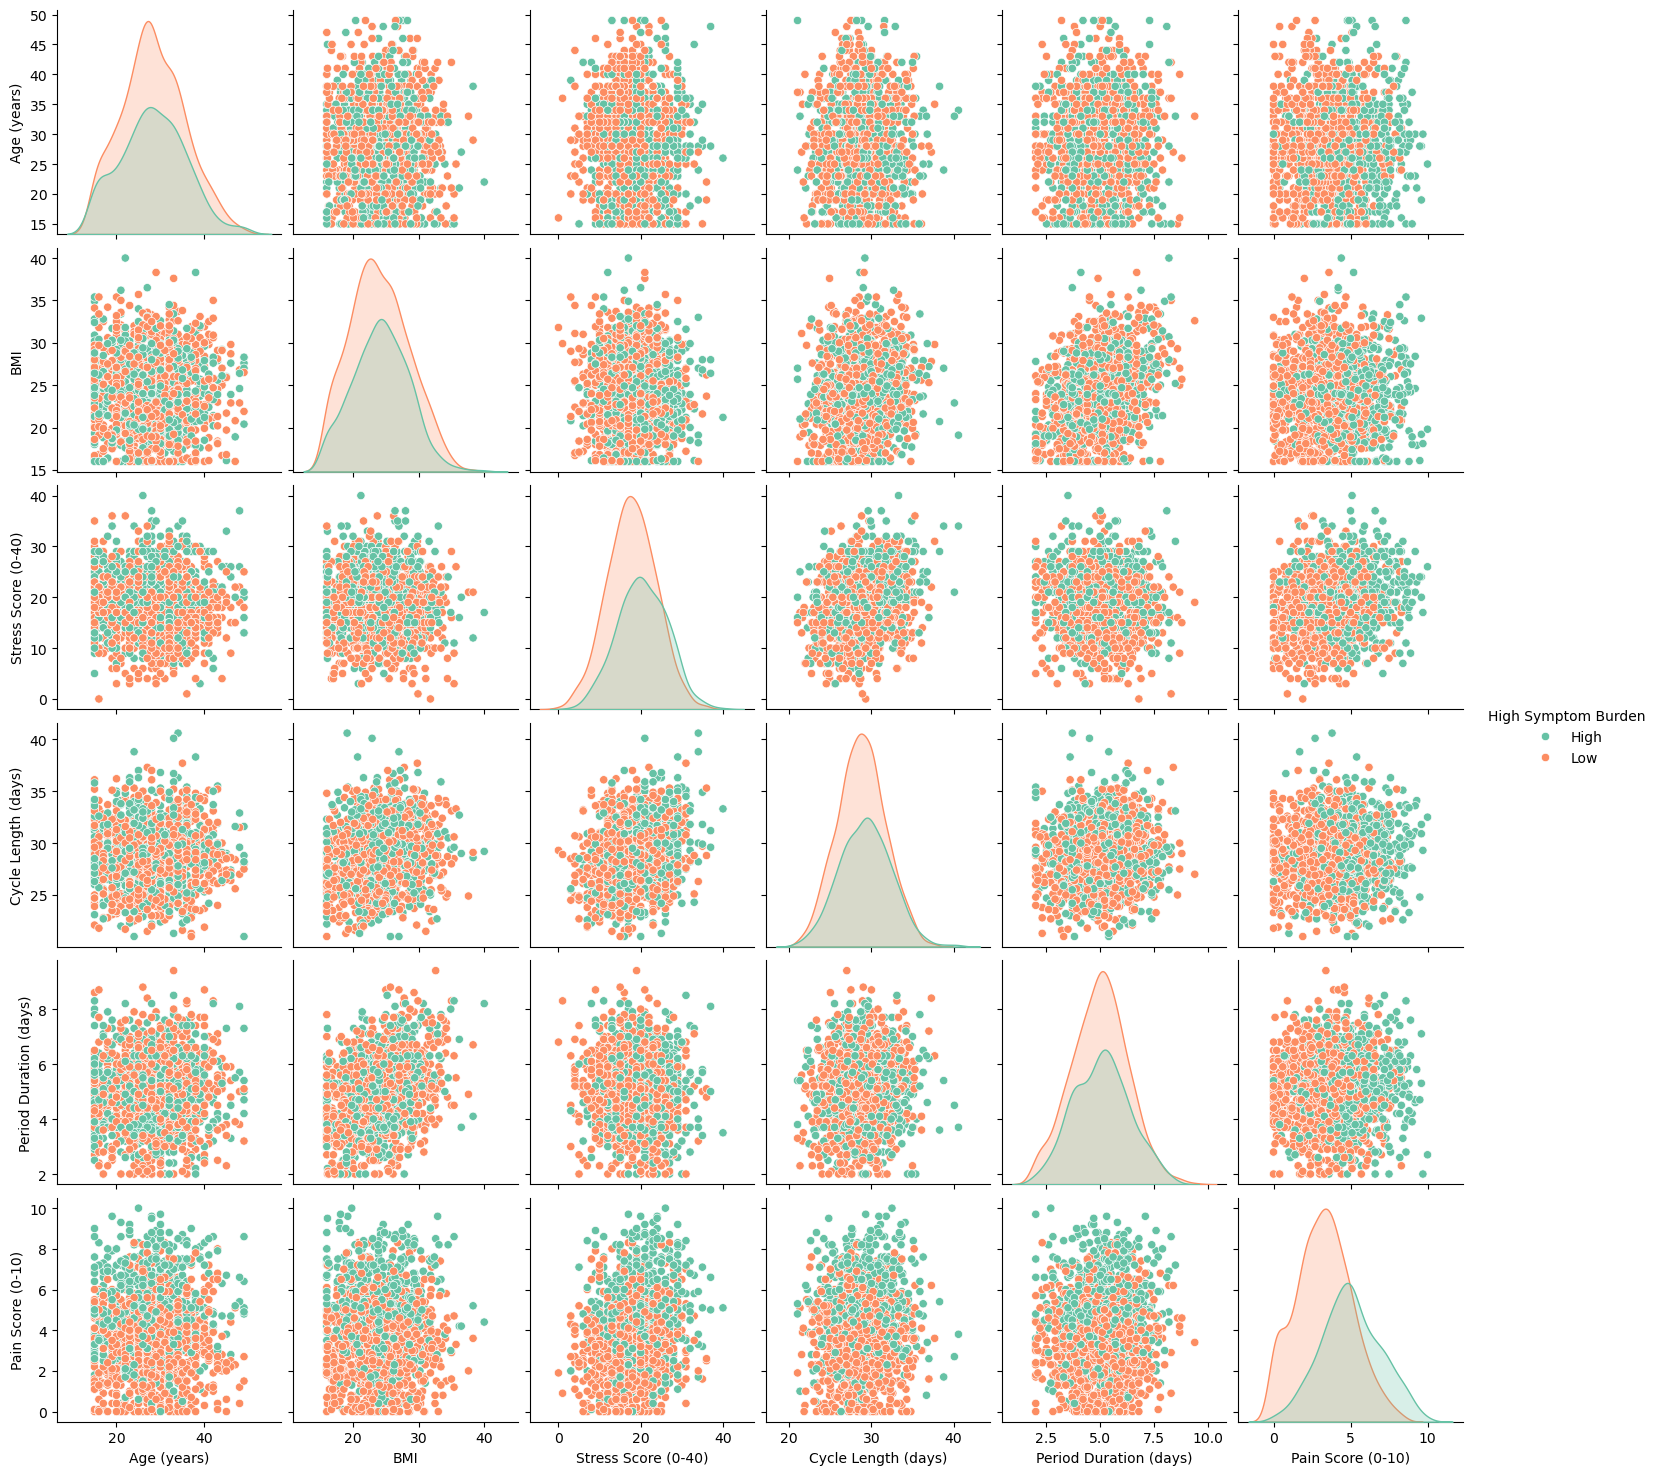

In [818]:
# Let's have a general view.
sns.color_palette()
sns.pairplot(df, hue="High Symptom Burden")

## Research Question 1: What are the effects of BMI and diet pattern on the period duration?

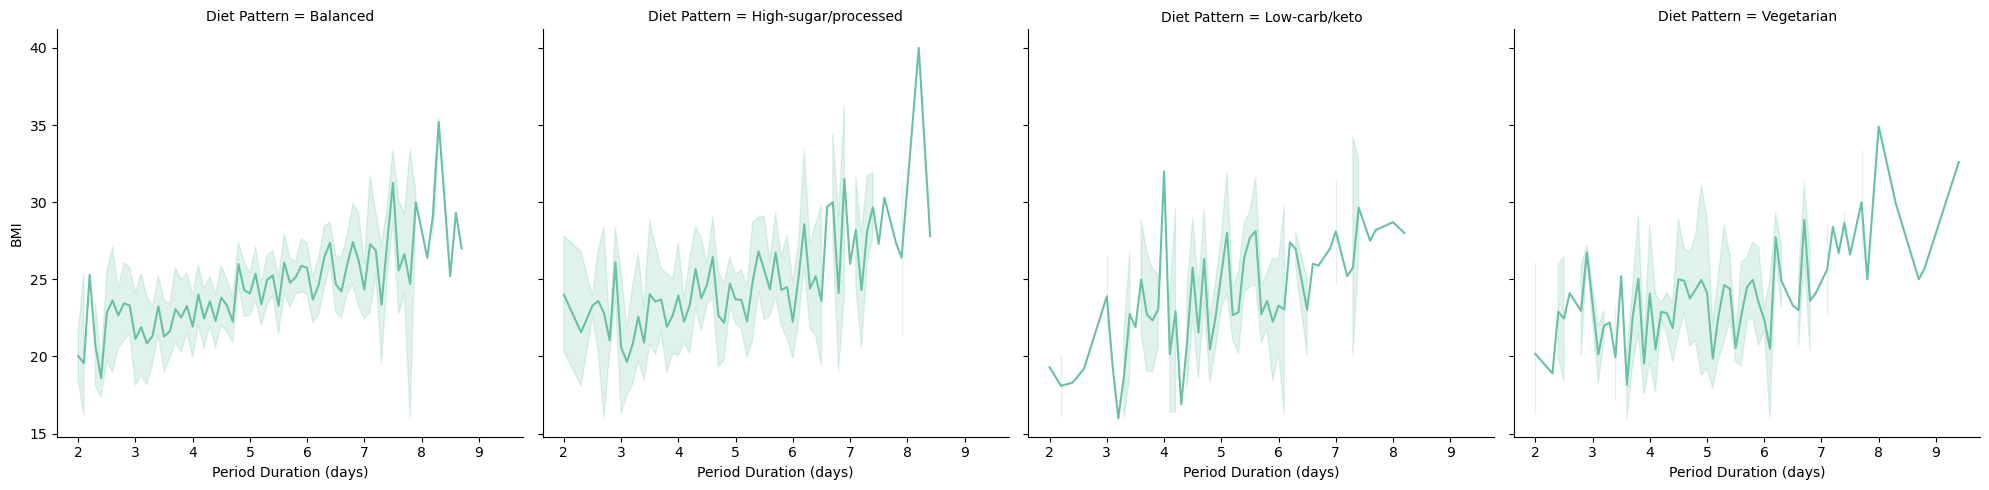

In [819]:
sns.relplot(df, x = "Period Duration (days)", y = "BMI", col = "Diet Pattern", kind  = "line")

### BMI (Body Mass Index) and dietary habits often play a role in menstrual periods. These line plots show that even with varying diet patterns, period duration tends to increase with increasing BMI. However, balanced diet shows more consistent increase while a vegetarian diet and low carb/keto diet has rather extreme variations. 

## Research Question 2: Is there a meaningful relationship between different levels of education, pain level, and stress level?

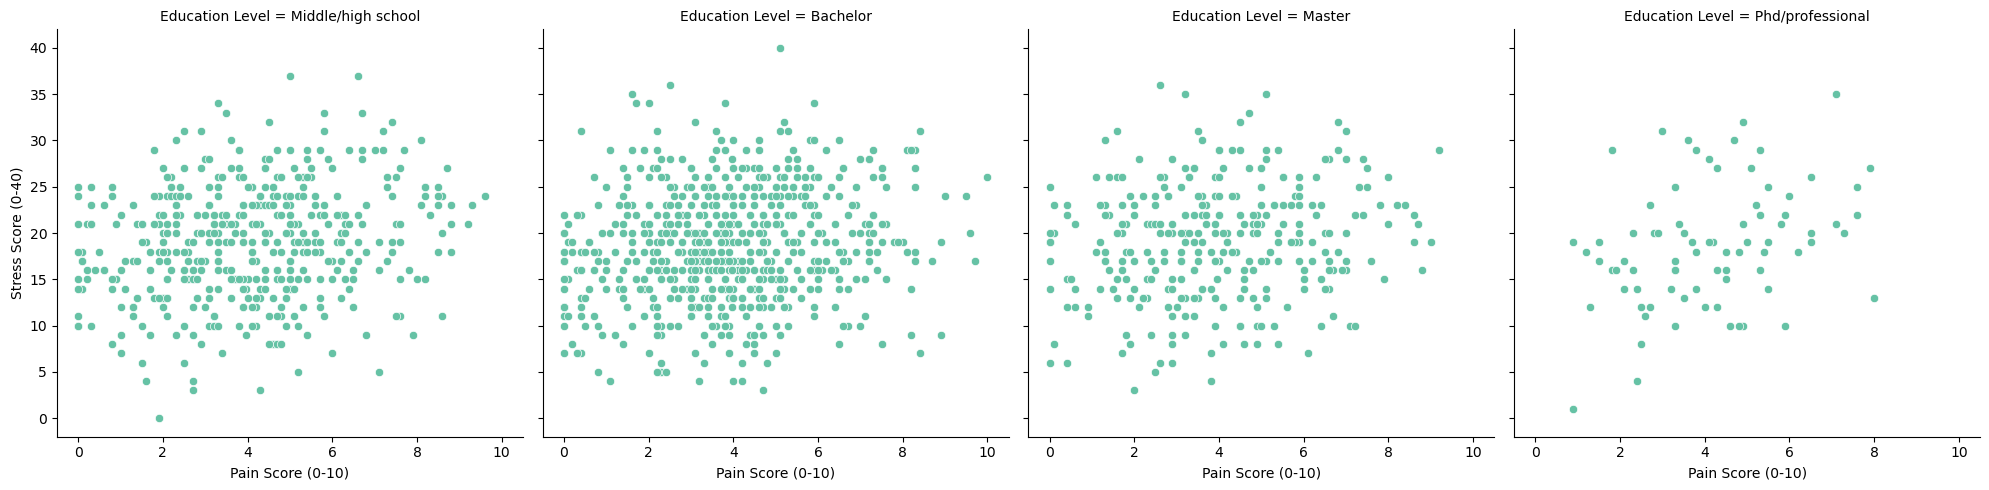

In [820]:
sns.relplot(df, x = "Pain Score (0-10)", y = "Stress Score (0-40)", col = "Education Level", col_order = ["Middle/high school", "Bachelor", "Master", "Phd/professional"])

### From the plot here, it can be seen that higher education level does not necessarily imply higher stress level. Yet, rather extreme pain scores are observed less as education level goes up. One might think that higher education level would bring higher quality of life, however, this does not lower stress levels. Therefore, there is no meaningful relationship with varying education levels and menstrual pain.

## Research Question 3: Do individuals with better healthcare access suffer less? How does that affect symptoms?

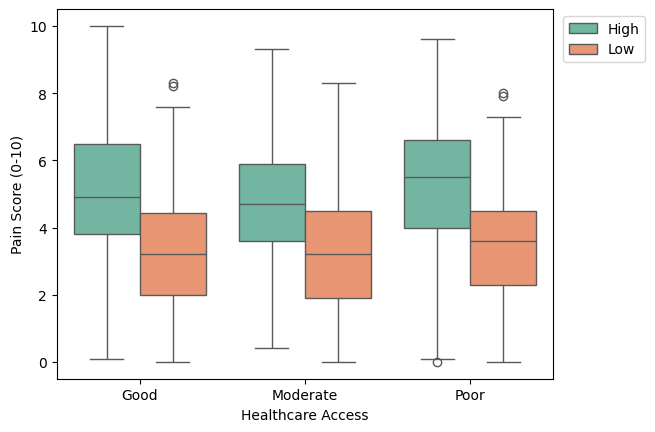

In [821]:
sns.boxplot(df, y = "Pain Score (0-10)", x = "Healthcare Access", hue = "High Symptom Burden")
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')

### In this visualization, it is clear that regardless of healthcare access, symptomatic individuals suffer more pain. However, with better healthcare, pain levels go lower.

## Research Question 4: Is there a relationship between cycle length and pain score?

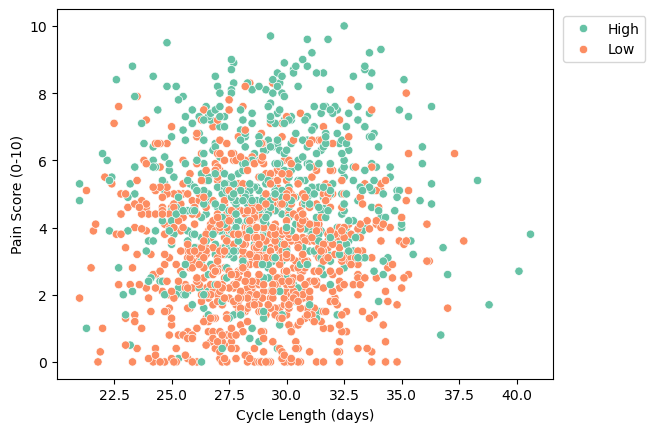

In [822]:
sns.scatterplot(df, x = "Cycle Length (days)", y = "Pain Score (0-10)", hue = "High Symptom Burden")
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')

### This scatter plot shows no linear relationship between cycle length and pain score, however, individuals that show higher symptom burden have a slightly longer cycle.

## Research Question 5: Do employed women suffer more painful periods compared to unemployed women? How does stress level play as a factor here?

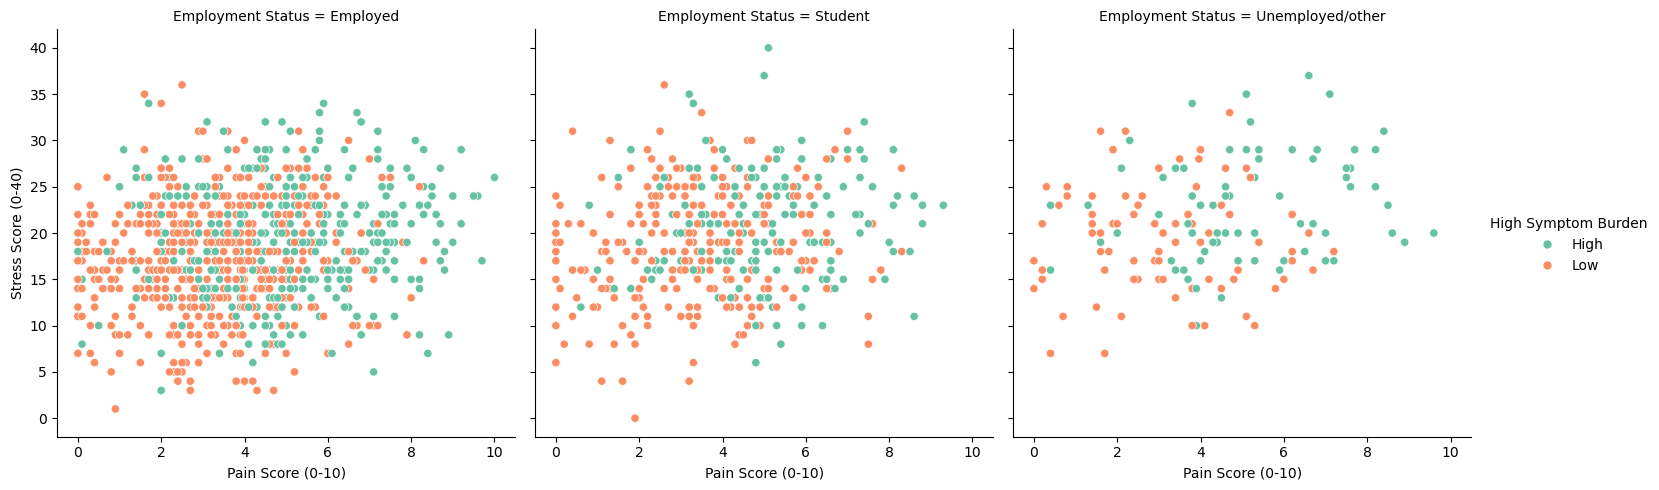

In [823]:
sns.relplot(df, x = "Pain Score (0-10)", y = "Stress Score (0-40)", col = "Employment Status", kind = "scatter", hue = "High Symptom Burden")

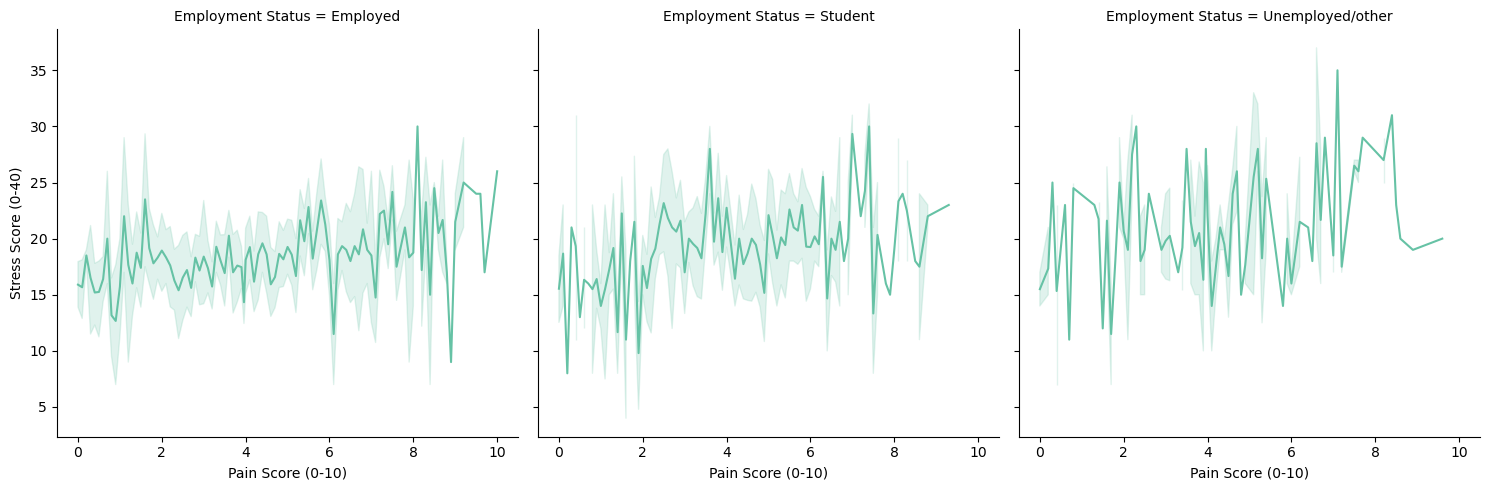

In [824]:
sns.relplot(df, x = "Pain Score (0-10)", y = "Stress Score (0-40)", col = "Employment Status", kind = "line")

### Both of these plots indicate that regardless of employment status, stress and pain have a positive relationship. Compared to employed individuals, unemployed/other people show less of a stable correlation, leading to more variation. This might be a result of not all unemployed people living a stressful life, especially retired people which would fall into this category. 

## Research Question 6: Is there a meaningful relationship between different types of contraceptive use and period duration?

<Axes: xlabel='Period Duration (days)', ylabel='Count'>

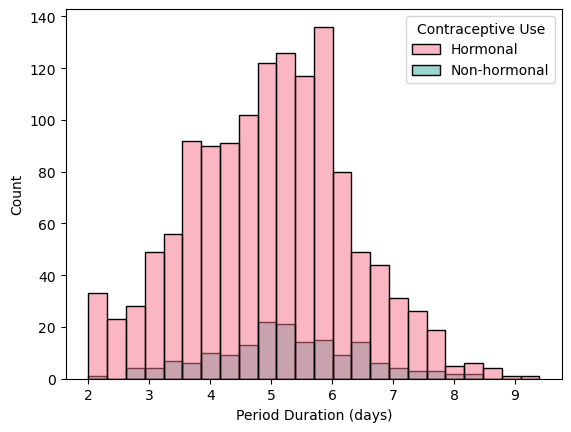

In [825]:
sns.histplot(df, x = "Period Duration (days)", hue = "Contraceptive Use", palette = "husl")

### This stacked histogram tells us that even though more individuals use contraceptives for hormon regulation, cause of usage does not affect the distribution of period duration frequency. Most of the observations are collected around 5-7 days of duration, which could tell that contraceptive use does not heavily influence the period length. 

## Research Question 7: How does smoking affect period duration? How does it play on pain level?

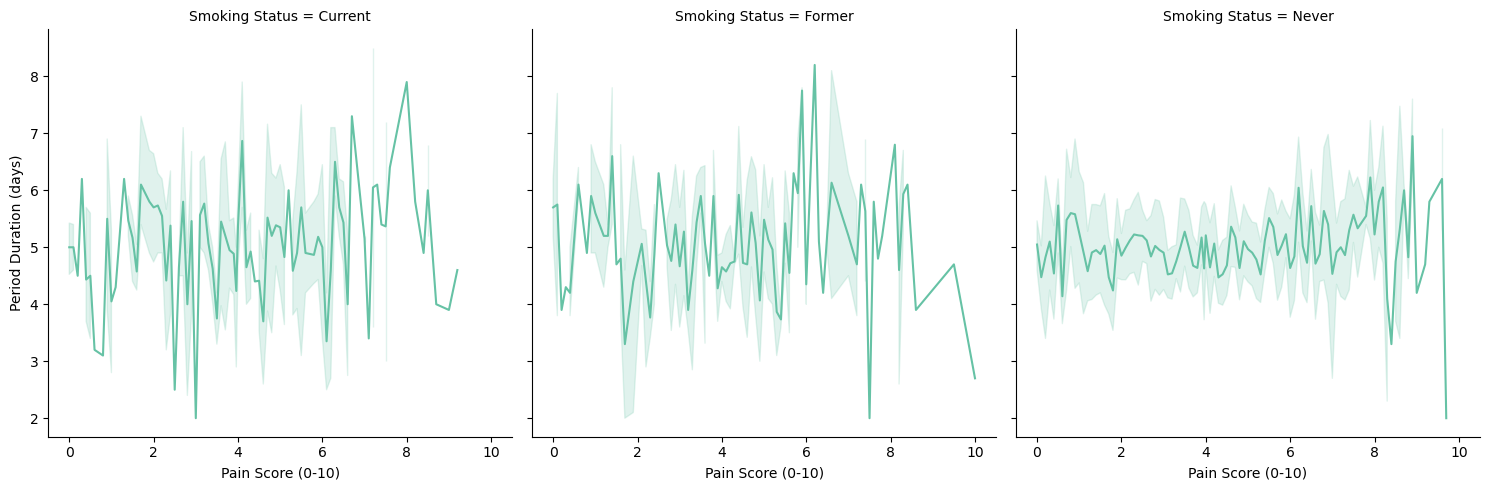

In [831]:
sns.relplot(df, x = "Pain Score (0-10)", y = "Period Duration (days)", col = "Smoking Status", kind = "line")

### In this plot, it can be seen that there is quite a variation for current and former smokers in period duration and pain level. Those who have never smoked show a stable, slightly positive relationship between pain and period length. This implies that smoking habit could affect pain levels even after quitting. Former smokers show high period durations even with low pain levels.

## Research Question 8: What is the effect of age in period duration?

<Axes: xlabel='Age (years)', ylabel='Period Duration (days)'>

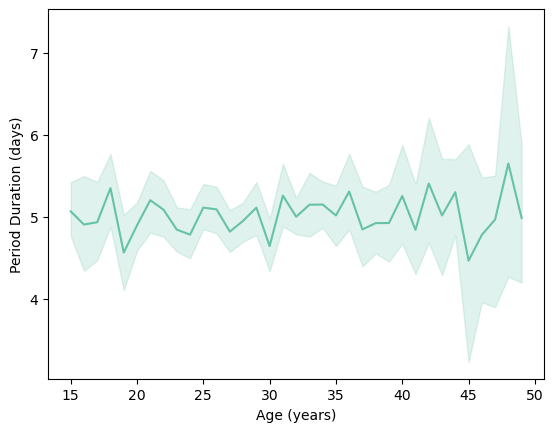

In [832]:
sns.lineplot(df, x = "Age (years)", y = "Period Duration (days)")

### In this line plot, there is not a significant relationship between age and period length, there is only an increase in length as age comes to over 45 years. This would make sense as women start to enter menopause phase closer to their 50's. In addition, with age comes a slower metabolism, hence the slight increase in period duration among ages.